In [22]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date
from statistics import mean

In [23]:
# Define the ticker symbol
tickerSymbol = 'SMH'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
history = tickerData.history(interval='1wk', start='2021-1-1', end=date.today())

In [24]:
CL = history['Low'].shift(-1) / history['Close'] - 1
print(f'{tickerSymbol} Close to next Low percentiles:')
for q in [0.5,0.8]:
    p = CL.quantile(q)
    print(f'{q:3.0%}: {p:7.2%}')

SMH Close to next Low percentiles:
50%:  -2.65%
80%:  -0.65%


In [25]:
print(f'{tickerSymbol} 1w O/L drawdown percentiles:')
for q in [0.1,0.2,0.5,0.8,0.9,0.95,0.98,0.99]:
    p = (history['Low'] / history['Open'] - 1).quantile(q)
    print(f'{q:3.0%}: {p:7.2%}')

SMH 1w O/L drawdown percentiles:
10%:  -6.93%
20%:  -5.27%
50%:  -2.48%
80%:  -0.81%
90%:  -0.35%
95%:  -0.19%
98%:  -0.07%
99%:  -0.05%


In [26]:
weeks = 4
option_leverage = 30
gap = (1/80)*100

print(f'period: {weeks} weeks')
print(f'option leverage: {option_leverage:.1f}')
print(f'option gap: {gap:.2f}%')
print(f'break even: {gap+100/option_leverage:.1f}%')

period: 4 weeks
option leverage: 30.0
option gap: 1.25%
break even: 4.6%


In [27]:
history['Stock Change'] = history['Close'].pct_change(periods=weeks) * 100
history['Option Profit'] = history['Stock Change'][weeks:].apply(lambda x: max(-100, (x - gap) * option_leverage - 100))

In [28]:
print(f'{tickerSymbol} {weeks}w option profit percentiles:')
for q in [0.5,0.8,0.9,0.95,0.98,0.99]:
    p = history['Option Profit'].quantile(q)
    print(f'{q:.0%}: {p:3.0f}%')

SMH 4w option profit percentiles:
50%: -78%
80%: 156%
90%: 296%
95%: 397%
98%: 473%
99%: 523%


In [29]:
history['Window Max'] = history['High'].rolling(window=pd.api.indexers.FixedForwardWindowIndexer(window_size=weeks)).max()


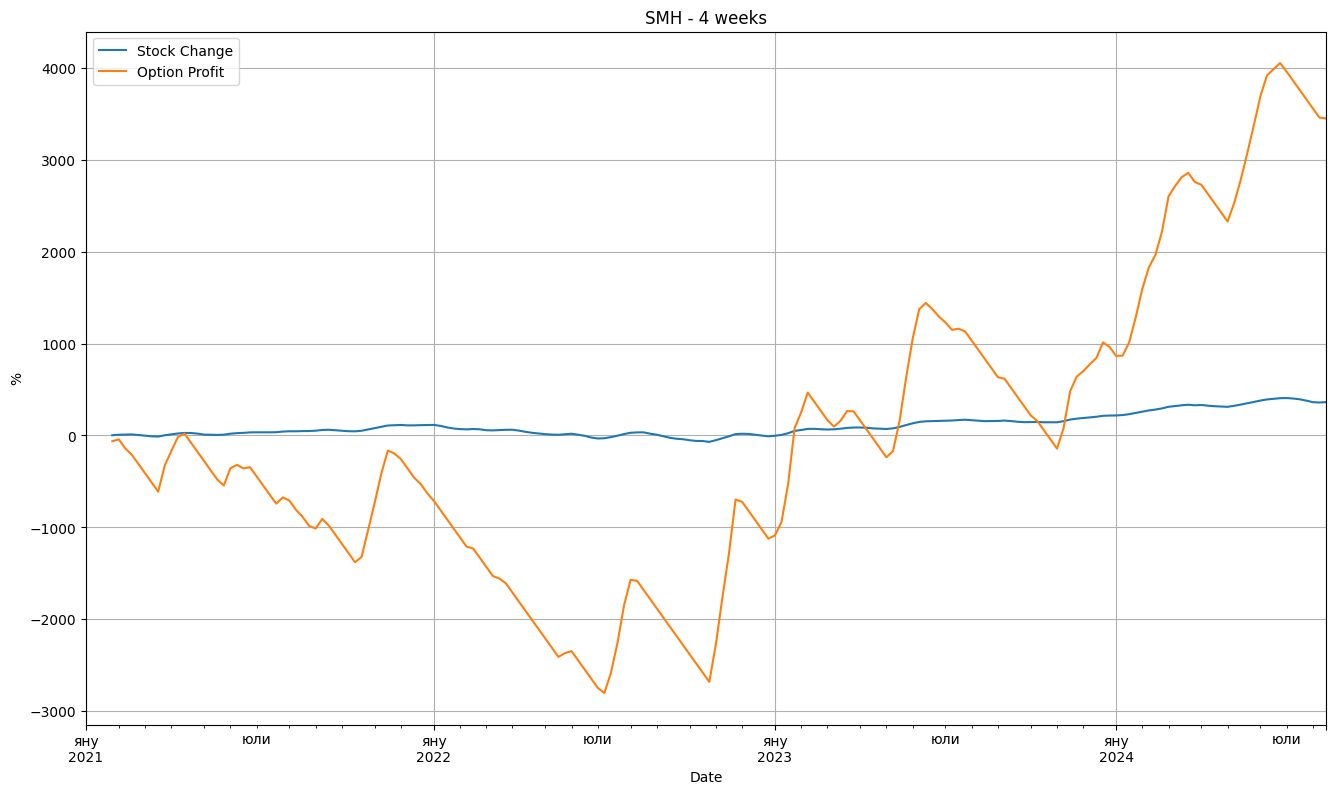

In [30]:
plt.figure(figsize=(16,9))
history['Stock Change'].cumsum().plot()
history['Option Profit'].cumsum().plot()

# plt.axhline(y=0, color='k', linestyle='--')
plt.legend()
plt.ylabel('%')
plt.title(f'{tickerSymbol} - {weeks} weeks')
plt.grid()
plt.show()
